In [2]:
%ls "../data"

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\nyc-tobacco\data

10/20/2016  04:03 PM    <DIR>          .
10/20/2016  04:03 PM    <DIR>          ..
10/20/2016  04:03 PM         1,456,820 10000_points_bronx.geojson
10/20/2016  04:00 PM         1,456,840 10000_points_brooklyn.geojson
10/20/2016  04:03 PM         1,456,820 10000_points_manhattan.geojson
10/20/2016  04:02 PM         1,456,823 10000_points_manhttan.geojson
10/20/2016  03:59 PM         1,456,844 10000_points_queens.geojson
10/20/2016  03:51 PM         1,456,846 10000_points_staten_island.geojson
10/20/2016  02:24 PM         3,077,124 boroughs.geojson
10/20/2016  02:28 PM                76 google-api-key.json
10/20/2016  01:11 PM                61 nyc-geocoder-api-key.json
10/20/2016  12:49 PM           321,113 tobacco-retailers.xlsx
10/20/2016  03:48 PM           766,672 tobacco-retailers-geocoded.csv
              11 File(s)     12,906,039 bytes
               2 Dir(s)

In [3]:
import geopandas as gpd

In [4]:
boroughs = gpd.read_file("../data/boroughs.geojson")

In [5]:
boroughs

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623853e+09,330385.03697,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,3.049947e+09,861038.47930,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,1.959432e+09,726568.94634,(POLYGON ((-73.8670614947212 40.58208797679338...
3,1,Manhattan,6.364422e+08,358532.95642,(POLYGON ((-74.01092841268033 40.6844914725429...
4,2,Bronx,1.186804e+09,464517.89055,(POLYGON ((-73.89680883223775 40.7958084451597...


In [11]:
si_p = gpd.read_file("../data/10000_points_staten_island.geojson")

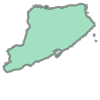

In [7]:
boroughs['geometry'][0]

In [21]:
import pandas as pd

tobacco = pd.read_csv("../data/tobacco-retailers-geocoded.csv")

In [22]:
tobacco.head()

,Unnamed: 0,Address Building,Address Street Name,Address City,Address State,Address ZIP,Address Borough,Latitude,Longitude
0,0,740,GERARD AVE,BRONX,NY,10451,Bronx,40.824546,-73.926663
1,1,268,WHITE PLAINS RD,BRONX,NY,10473,Bronx,40.810945,-73.855668
2,2,73,FEATHERBED LN,BRONX,NY,10452,Bronx,40.846355,-73.917433
3,3,330,E GUN HILL RD,BRONX,NY,10467,Bronx,40.878826,-73.873294
4,4,456,E 149TH ST,BRONX,NY,10455,Bronx,40.815325,-73.915900


In [28]:
import shapely

tobacco_locs = tobacco.apply(lambda srs: shapely.geometry.Point(srs['Longitude'], srs['Latitude']), axis='columns')
tobacco['geometry'] = tobacco_locs
tobacco = gpd.GeoDataFrame(tobacco)

,Unnamed: 0,Address Building,Address Street Name,Address City,Address State,Address ZIP,Address Borough,Latitude,Longitude,geometry
0,0,740,GERARD AVE,BRONX,NY,10451,Bronx,40.824546,-73.926663,POINT (-73.92666282825421 40.82454587497495)
1,1,268,WHITE PLAINS RD,BRONX,NY,10473,Bronx,40.810945,-73.855668,POINT (-73.85566755931745 40.81094464094615)
2,2,73,FEATHERBED LN,BRONX,NY,10452,Bronx,40.846355,-73.917433,POINT (-73.91743293791271 40.84635460806038)
3,3,330,E GUN HILL RD,BRONX,NY,10467,Bronx,40.878826,-73.873294,POINT (-73.87329360964058 40.87882555133326)
4,4,456,E 149TH ST,BRONX,NY,10455,Bronx,40.815325,-73.915900,POINT (-73.91589990977936 40.81532450487477)


In [29]:
del tobacco['Unnamed: 0']

In [30]:
tobacco.head()

,Address Building,Address Street Name,Address City,Address State,Address ZIP,Address Borough,Latitude,Longitude,geometry
0,740,GERARD AVE,BRONX,NY,10451,Bronx,40.824546,-73.926663,POINT (-73.92666282825421 40.82454587497495)
1,268,WHITE PLAINS RD,BRONX,NY,10473,Bronx,40.810945,-73.855668,POINT (-73.85566755931745 40.81094464094615)
2,73,FEATHERBED LN,BRONX,NY,10452,Bronx,40.846355,-73.917433,POINT (-73.91743293791271 40.84635460806038)
3,330,E GUN HILL RD,BRONX,NY,10467,Bronx,40.878826,-73.873294,POINT (-73.87329360964058 40.87882555133326)
4,456,E 149TH ST,BRONX,NY,10455,Bronx,40.815325,-73.915900,POINT (-73.91589990977936 40.81532450487477)


In [78]:
from tqdm import tqdm_notebook

In [79]:
tqdm_notebook().pandas()

In [89]:
import pyproj
geod = pyproj.Geod(ellps='WGS84')
# angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

def get_dists(geom, points, borough):
    t = tobacco[tobacco['Address Borough'] == borough]
    
    def get_dist(p):
        min_dist = 10000
        p_long, p_lat = list(p.coords)[0]
        for p_c in t['geometry']:
            p_c_long, p_c_lat = list(p_c.coords)[0]
            _, _, distance = geod.inv(p_c_long, p_c_lat, p_long, p_lat)
            if distance < min_dist:
                min_dist = distance
        return min_dist
    
    return map(get_dist, points)

In [82]:
tobacco['Address Borough'].value_counts()

Brooklyn         2725
Manhattan        2192
Queens           2115
Bronx            1541
Staten Island     418
MANHATTAN           3
QUEENS              1
Outside NYC         1
Name: Address Borough, dtype: int64

LOL what the heck is Outside NYC?

In [83]:
tobacco[tobacco['Address Borough'] == 'Outside NYC']

,Address Building,Address Street Name,Address City,Address State,Address ZIP,Address Borough,Latitude,Longitude,geometry
6461,1228,MIDDLE COUNTRY RD,SELDEN,NY,11784,Outside NYC,40.712784,-74.005941,POINT (-74.00594129999999 40.7127837)


Mid Long Island???

In [104]:
si_dists = get_dists(boroughs['geometry'][0], 
                     gpd.read_file("../data/10000_points_staten_island.geojson")['geometry'], 
                     'Staten Island')

In [110]:
si_dists = list(si_dists)

In [111]:
len(si_dists)

10000

In [113]:
import numpy as np
np.average(si_dists)

561.09394277510307

In [117]:
queens_dists = get_dists(boroughs['geometry'][1], 
                         gpd.read_file("../data/10000_points_queens.geojson")['geometry'], 
                         'Queens')
queens_dists = list(queens_dists)

In [119]:
brooklyn_dists = get_dists(boroughs['geometry'][2], 
                         gpd.read_file("../data/10000_points_brooklyn.geojson")['geometry'], 
                         'Brooklyn')
brooklyn_dists = list(brooklyn_dists)

In [132]:
manhattan_dists = get_dists(boroughs['geometry'][3], 
                         gpd.read_file("../data/10000_points_manhattan.geojson")['geometry'], 
                         'Manhattan')
manhattan_dists = list(manhattan_dists)

In [121]:
bronx_dists = get_dists(boroughs['geometry'][4], 
                         gpd.read_file("../data/10000_points_bronx.geojson")['geometry'], 
                         'Bronx')
bronx_dists = list(bronx_dists)

In [133]:
[np.average(d) for d in [si_dists, queens_dists, brooklyn_dists, manhattan_dists, bronx_dists]]

[561.09394277510307,
 442.5610837998039,
 416.56892998285946,
 207.46749314743272,
 369.9127298021624]

In [131]:
import mplleaflet
gpd.read_file("../data/10000_points_manhattan.geojson").plot()
mplleaflet.show()

The underlying distance has an exponential distribution.

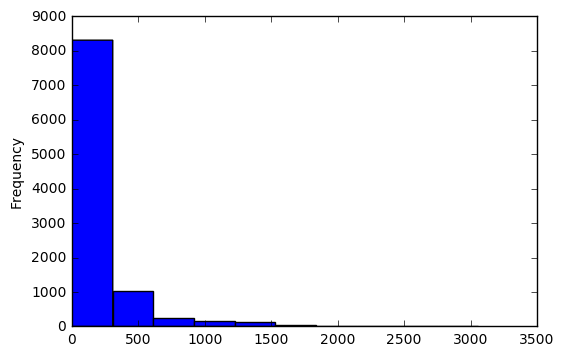

In [137]:
%matplotlib inline
pd.Series(manhattan_dists).plot(kind='hist')

In [138]:
np.argmax(manhattan_dists)

9304

In [139]:
manhattan_dists[9304]

3058.714128067066

This point is on Liberty Island:

In [148]:
gpd.GeoSeries(gpd.read_file("../data/10000_points_manhattan.geojson")['geometry'].iloc[9304]).plot()
mplleaflet.show()

In [147]:
sorted(manhattan_dists, reverse=True)[:20]

[3058.714128067066,
 3054.2951266730297,
 3034.3222502500357,
 3023.2721402425336,
 2984.7552656728362,
 2970.363627406998,
 2965.8033949336027,
 2944.590374338626,
 2942.6239941848685,
 2937.549822175822,
 2889.8320355048495,
 2417.0507457693457,
 2383.5173045721367,
 2355.064898974738,
 2349.431328219382,
 2344.628588232286,
 2340.781702006659,
 2331.6102637110025,
 2321.9098595685923,
 2299.760464047595]

STD is enormous because of "island effects" causing extreme outliers:

In [151]:
[np.std(d) for d in [si_dists, queens_dists, brooklyn_dists, manhattan_dists, bronx_dists]]

[399.05670520961309,
 470.18844186651455,
 776.1870791768979,
 305.43359944731515,
 438.83013843930848]

In such cases, a median is more meaningful:

In [152]:
[np.median(d) for d in [si_dists, queens_dists, brooklyn_dists, manhattan_dists, bronx_dists]]

[465.6986775596356,
 280.12849562097711,
 166.46721332256482,
 105.80841863808703,
 208.43079988282449]

...but the differences are enormous, showing just how heavy the skew is!

In [153]:
[np.median(d) - np.average(d) for d in [si_dists, queens_dists, brooklyn_dists, manhattan_dists, bronx_dists]]

[-95.395265215467475,
 -162.43258817882679,
 -250.10171666029464,
 -101.65907450934569,
 -161.48192991933792]

In [165]:
for d in [si_dists, queens_dists, brooklyn_dists, manhattan_dists, bronx_dists]:
    d = np.sort(d)[int(len(d) * 0.0):int(len(d) * 0.9)]
    print(np.average(d), np.median(d))

462.831741373 422.949808325 271.714991759
313.997248654 250.337704606 231.789336015
198.741757793 148.56182119 159.561220647
125.810850693 95.4431211285 97.2978903369
247.420530683 180.836328191 201.537445354


In [164]:
tobacco[tobacco['Address Borough'] == 'Queens'].plot()
mplleaflet.show()

At this point let's stop for a moment to talk metrics...so, the underlying distribution is exponential, resulting in the hairy-looking numbers above&mdash;this isn't a well-behaved normal data distribution. But the SD of the distances doesn't tell us anything about the standard deviation of what we *actually* want, our mean. This *will* be normal, by the central limit theorem, and we can find it by bootstrapping.

Technically, good cross-validation would require that we split the dataset into homogenous wholes, with none of the data points appearing more than once. Reusing data points is incorrect because it reduces the volatility of our model. It would also require repeating the process we've done here&mdash;generating and testing 10000 points&mdash;multiple times, which would be an enormous time cost because that stuff ain't quick.

We'll instead bootstrap on 1000-point with-replacement subsets of the overall data. This will result in a slightly more stable than statistically correct mean estimator distribution for a 1000-point mean distance estimator.

The trick is that we accept that this will be a reasonable lower bound on the accuracy of a 10000 point estimator, which I believe will have variability (having an order of magnitude more points) significantly lower than that of what we will get out of our test. SInce we merely want a lower bound, which this will then be, this is fine.

**Staten Island**

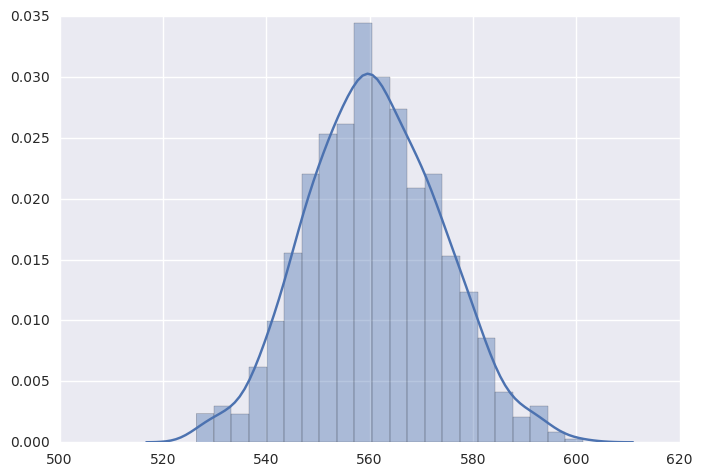

In [178]:
si_means = []
i = 0
while i < 1000:
    si_means.append(np.mean(np.random.choice(si_dists, size=1000)))
    i += 1

import seaborn as sns
sns.distplot(pd.Series(si_means))

In [186]:
np.mean(si_means), np.std(si_means)*2

(560.93608963381325, 25.667713220114088)

**Queens**

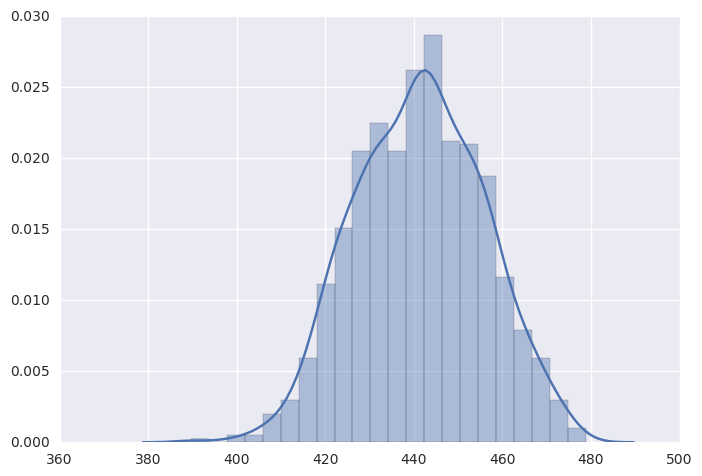

In [180]:
queens_means = []
i = 0
while i < 1000:
    queens_means.append(np.mean(np.random.choice(queens_dists, size=1000)))
    i += 1

import seaborn as sns
sns.distplot(pd.Series(queens_means))

In [187]:
np.mean(queens_means), np.std(queens_means)*2

(441.30837248507703, 28.867517642869757)

**Brooklyn**

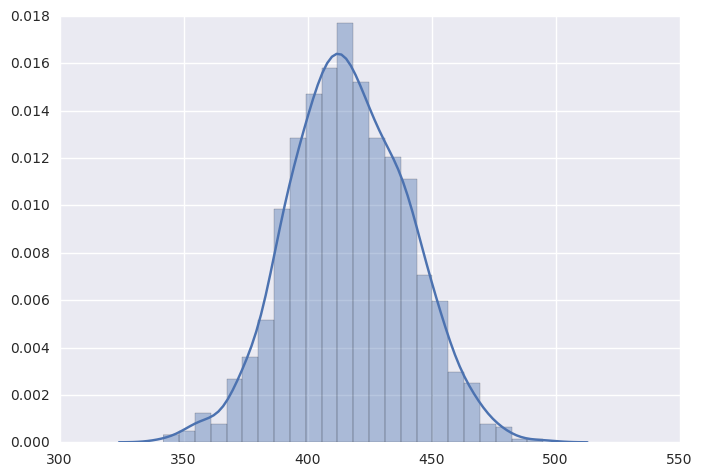

In [182]:
brooklyn_means = []
i = 0
while i < 1000:
    brooklyn_means.append(np.mean(np.random.choice(brooklyn_dists, size=1000)))
    i += 1

import seaborn as sns
sns.distplot(pd.Series(brooklyn_means))

In [188]:
np.mean(brooklyn_means), np.std(brooklyn_means)*2

(416.64720461338248, 47.331025217160764)

**Manhattan**

In [171]:
manhattan_means = []
i = 0
while i < 1000:
    manhattan_means.append(np.mean(np.random.choice(manhattan_dists, size=1000)))
    i += 1

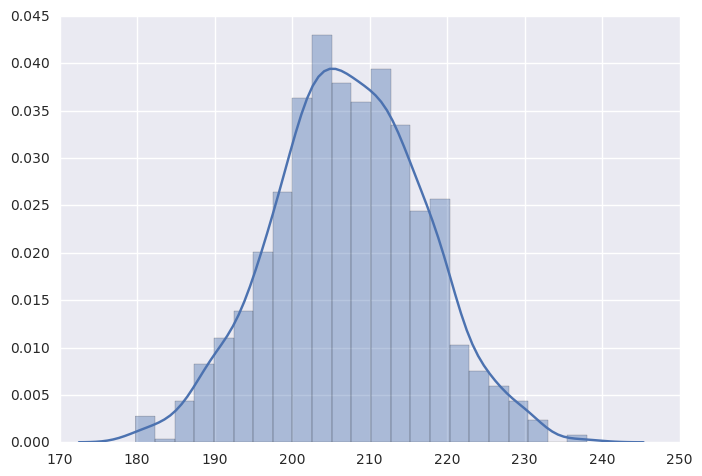

In [174]:
import seaborn as sns
sns.distplot(pd.Series(manhattan_means))

In [189]:
np.mean(manhattan_means), np.std(manhattan_means)*2

(207.32004378305194, 19.317427813660803)

**Bronx**

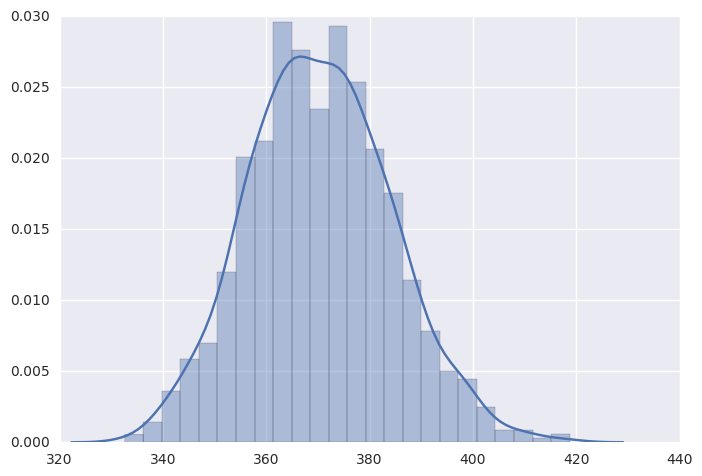

In [184]:
bronx_means = []
i = 0
while i < 1000:
    bronx_means.append(np.mean(np.random.choice(bronx_dists, size=1000)))
    i += 1

import seaborn as sns
sns.distplot(pd.Series(bronx_means))

In [191]:
np.mean(bronx_means), np.std(bronx_means)*2

(370.42310143447185, 27.42277237278719)

In terms of city blocks, there are ~264 feet to a city block side, which is ~80 meters, so:

In [194]:
for m in [si_means, queens_means, brooklyn_means, manhattan_means, bronx_means]:
    print((np.mean(m)/80, np.std(m)*2/80))

(7.011701120422666, 0.3208464152514261)
(5.5163546560634629, 0.36084397053587197)
(5.2080900576672811, 0.59163781521450953)
(2.5915005472881494, 0.24146784767076004)
(4.6302887679308977, 0.34278465465983987)


**Citywide**:

In [199]:
np.concatenate((np.array(si_dists), np.array(queens_dists), np.array(brooklyn_dists), np.array(manhattan_dists), np.array(bronx_dists)))

array([  92.83235014,  519.07951928,  963.67426138, ...,  362.58952043,
        234.6471429 ,  800.58320594])

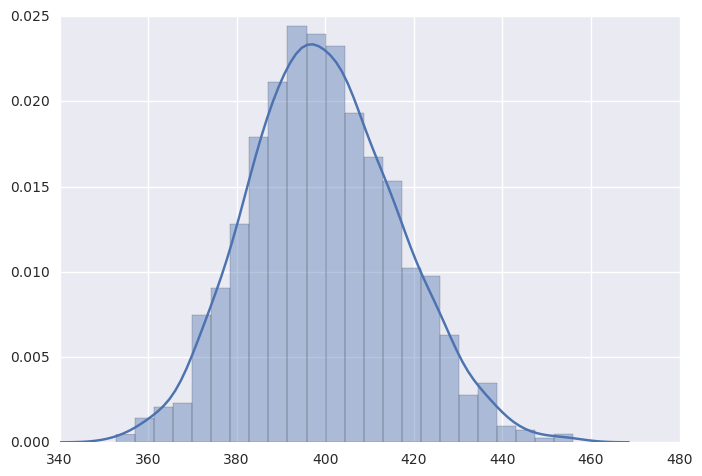

In [200]:
citywide_distances = np.concatenate((np.array(si_dists), np.array(queens_dists), np.array(brooklyn_dists), np.array(manhattan_dists), np.array(bronx_dists)))
i = 0
citywide_means = []
while i < 1000:
    citywide_means.append(np.mean(np.random.choice(citywide_distances, size=1000)))
    i += 1

import seaborn as sns
sns.distplot(pd.Series(citywide_means))

In [202]:
np.mean(citywide_means)/80, np.std(citywide_means)*2/80

(4.9963410104651889, 0.41653048353135719)

In [206]:
for i, m in enumerate([si_means, queens_means, brooklyn_means, manhattan_means, bronx_means]):
    pd.Series(m).to_csv("../data/{0}_means.csv".format(boroughs['BoroName'].iloc[i].replace(" ", "_").low))

In [207]:
%ls

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\nyc-tobacco\notebooks

10/20/2016  08:25 PM    <DIR>          .
10/20/2016  08:25 PM    <DIR>          ..
10/20/2016  04:05 PM    <DIR>          .ipynb_checkpoints
10/20/2016  07:31 PM         2,418,692 _map.html
10/20/2016  08:25 PM            22,750 {0}_means.csv
10/20/2016  03:48 PM           163,772 01---Geocoding.ipynb
10/20/2016  07:21 PM         3,167,535 02---Point Generation.ipynb
10/20/2016  08:20 PM           644,821 03---Generating Distances.ipynb
10/20/2016  08:25 PM            23,286 Bronx_means.csv
10/20/2016  08:25 PM            23,248 Brooklyn_means.csv
10/20/2016  08:25 PM            23,590 Manhattan_means.csv
10/20/2016  08:25 PM            23,281 Queens_means.csv
10/20/2016  08:25 PM            22,750 Staten Island_means.csv
              10 File(s)      6,533,725 bytes
               3 Dir(s)   5,778,460,672 bytes free
